# Transaction Fraud Detection

In [2]:
# Importing libraries 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [20]:
# Importing data
df = pd.read_csv('payment_fraud.csv')
df.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
0,29,1,4.745402,paypal,28.204861,0
1,725,1,4.742303,storecredit,0.000000,0
2,845,1,4.921318,creditcard,0.000000,0
3,503,1,4.886641,creditcard,0.000000,0
4,2000,1,5.040929,creditcard,0.000000,0


In [22]:
print(df.columns)

Index(['accountAgeDays', 'numItems', 'localTime', 'paymentMethod',
       'paymentMethodAgeDays', 'label'],
      dtype='object')


In [24]:
df.rename(columns={'paymentMethod': 'paymentMethod'}, inplace=True)

In [26]:
#Convert paymentMethod entries to unique numeric values
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'paymentMethod' column
df['paymentMethod'] = label_encoder.fit_transform(df['paymentMethod'])


In [72]:
print("paymentMethod datatype:", df['paymentMethod'].dtype)
print("Unique Values in paymentMethod:", df['paymentMethod'].unique())

paymentMethod datatype: int32
Unique Values in paymentMethod: [1 2 0]


In [68]:
df.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
0,29,1,4.745402,1,28.204861,0
1,725,1,4.742303,2,0.000000,0
2,845,1,4.921318,0,0.000000,0
3,503,1,4.886641,0,0.000000,0
4,2000,1,5.040929,0,0.000000,0


In [38]:
# Check if any value in 'paymentMethod' is not numeric
non_numeric = df['paymentMethod'].apply(lambda x: not isinstance(x, (int, float)))
print(df[non_numeric])

Empty DataFrame
Columns: [accountAgeDays, numItems, localTime, paymentMethod, paymentMethodAgeDays, label]
Index: []


In [42]:
# Split dataset up into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('label', axis=1), df['label'],
    test_size=0.33, random_state=17)

In [58]:
#train the fraud detection model using logistic regression algorithm 
clf = LogisticRegression().fit(X_train, y_train)

# Make predictions on test set
y_pred = clf.predict(X_test)

In [60]:
#Check accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [52]:
# Compare test set predictions with actual answers
print(confusion_matrix(y_test, y_pred))

[[12753     0]
 [    0   190]]


In [56]:
from sklearn.metrics import classification_report

# Print classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n\n", report)

Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     12753
           1       1.00      1.00      1.00       190

    accuracy                           1.00     12943
   macro avg       1.00      1.00      1.00     12943
weighted avg       1.00      1.00      1.00     12943



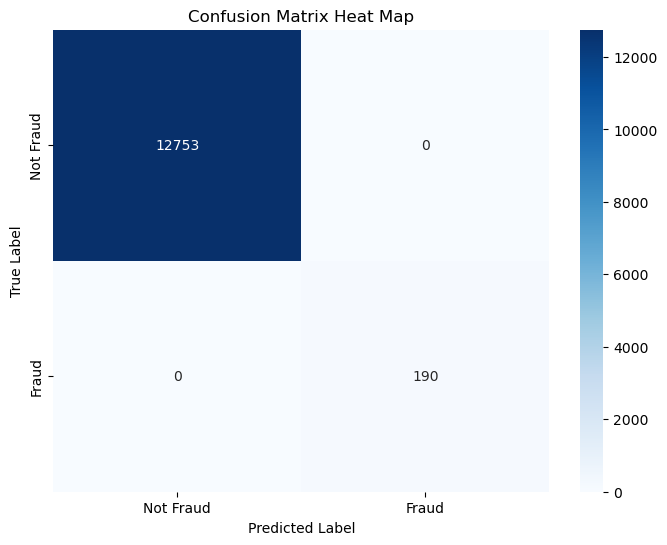

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Fraud', 'Fraud'], 
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heat Map')
plt.show()


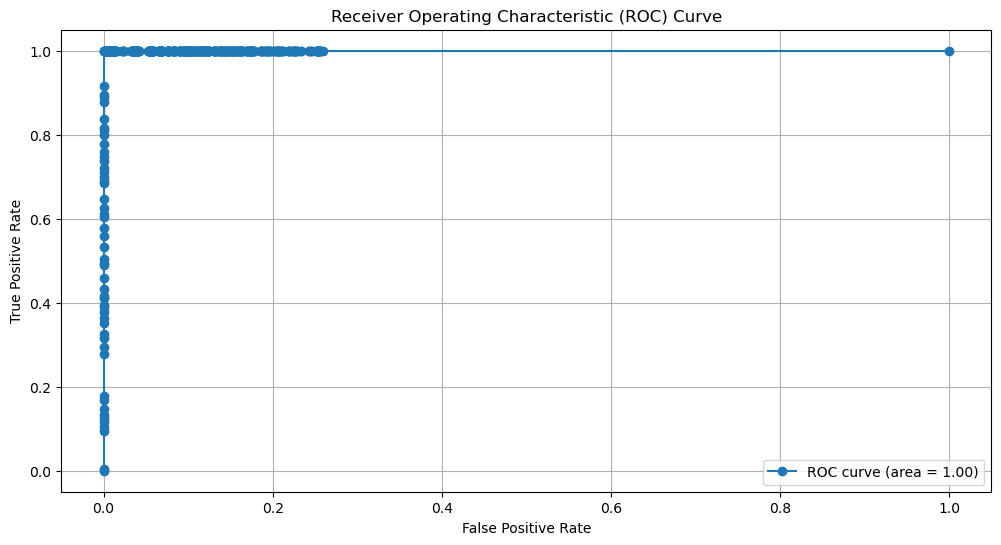

In [66]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class
y_prob = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(fpr, tpr, marker='o', label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()